Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Модель-градиентного-бустинга-LightGBM" data-toc-modified-id="Модель-градиентного-бустинга-LightGBM-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель градиентного бустинга LightGBM</a></span></li><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Модель-случайного-леса" data-toc-modified-id="Модель-случайного-леса-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель случайного леса</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

Приступаем к знакомству с данными:

In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=['datetime'])

In [3]:
data.head()

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26496 entries, 0 to 26495
Data columns (total 2 columns):
datetime      26496 non-null datetime64[ns]
num_orders    26496 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 414.1 KB


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Данные готовы)Приступаем к самому интересному)
</div>

Всего 2 колонки. Дату мы перобразуем в индексы и ресемплируем по одному часу:

In [5]:
data = data.set_index('datetime')

In [6]:
data = data.resample('H').sum()

Теперь обогатим признаковое пространство. Добавим смещения и информацию о дне недели, месяце.

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Смотреть ни на что не будем?)Может как-то изучим, чтобы знать сколько лагов например делать?)
</div>

In [7]:
data['day'] = data.index.day
data['hour'] = data.index.hour
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month

In [8]:
data['lag_1'] = data['num_orders'].shift(1)
data['lag_2'] = data['num_orders'].shift(2)
data['lag_3'] = data['num_orders'].shift(3)

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Лучше это всё в функцию обернуть)
</div>

In [9]:
data['rolling_mean'] = data['num_orders'].shift().rolling(5).mean()

Добавим призрнак разности между предыдущим значением целевого признака и следующим перед ним:

In [10]:
data['diffs'] = data['lag_1'] - data['lag_2']

Избавимся от появившихся пропусков:

In [11]:
data = data.dropna()

In [12]:
data.head()

,num_orders,day,hour,dayofweek,month,lag_1,lag_2,lag_3,rolling_mean,diffs
datetime,,,,,,,,,,
2018-03-01 05:00:00,6,1,5,3,3,43.0,66.0,71.0,77.8,-23.0
2018-03-01 06:00:00,12,1,6,3,3,6.0,43.0,66.0,54.2,-37.0
2018-03-01 07:00:00,15,1,7,3,3,12.0,6.0,43.0,39.6,6.0
2018-03-01 08:00:00,34,1,8,3,3,15.0,12.0,6.0,28.4,3.0
2018-03-01 09:00:00,69,1,9,3,3,34.0,15.0,12.0,22.0,19.0


Посмотрим на итоговую матрицу корреляции:

In [13]:
data.corr()

,num_orders,day,hour,dayofweek,month,lag_1,lag_2,lag_3,rolling_mean,diffs
num_orders,1.000000,0.165331,0.004200,-0.019633,0.510592,0.624175,0.465546,0.321323,0.495734,0.183466
day,0.165331,1.000000,-0.002614,-0.013854,0.002662,0.165502,0.165463,0.165094,0.216322,0.000247
hour,0.004200,-0.002614,1.000000,-0.000004,-0.002280,-0.076056,-0.120293,-0.154588,-0.162603,0.050858
dayofweek,-0.019633,-0.013854,-0.000004,1.000000,-0.011981,-0.027334,-0.029569,-0.029058,-0.037595,0.002541
month,0.510592,0.002662,-0.002280,-0.011981,1.000000,0.510692,0.510445,0.510316,0.668577,0.000907
lag_1,0.624175,0.165502,-0.076056,-0.027334,0.510692,1.000000,0.623496,0.465074,0.696915,0.434870
lag_2,0.465546,0.165463,-0.120293,-0.029569,0.510445,0.623496,1.000000,0.623211,0.794789,-0.432891
lag_3,0.321323,0.165094,-0.154588,-0.029058,0.510316,0.465074,0.623211,1.000000,0.832439,-0.181572
rolling_mean,0.495734,0.216322,-0.162603,-0.037595,0.668577,0.696915,0.794789,0.832439,1.000000,-0.111880
diffs,0.183466,0.000247,0.050858,0.002541,0.000907,0.434870,-0.432891,-0.181572,-0.111880,1.000000


Некоторые признаки достаточно сильно связаны друг с другом. Самая сильная корреляция наблюдается между rolling_mean	и lag_3. Возможно, это навредит качеству модели. Не исключено, что впоследствии мы избавимся от одного из этих признаков.

### Вывод:

Данные изучены и подготовлены. 
- Временные ряды ресемплированы по одному часу.
- Обогащено признаковое пространство
- Проверена матрица корреляции

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Кирилл, на мой взгляд у тебя немного нарушена логика в работе. Ты сначала должен делать анализ, а потом уже на его основе обогащать наши данные)Посмотрим что у тебя получилось, но порядок стоит изменить)
</div>

## Анализ

Проанализируем данные с точки зрения сезонности, трендов, и пр.

Смотрим как сильно меняется дисперсия целевого признака с течением времени:

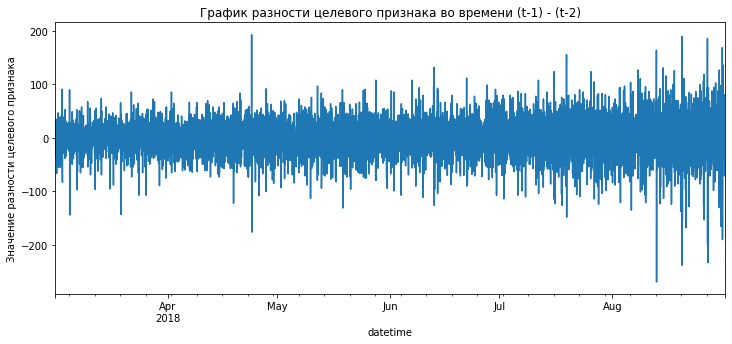

In [14]:
plt.figure(figsize=(12, 5))
data['diffs'].plot()
plt.title('График разности целевого признака во времени (t-1) - (t-2)')
plt.ylabel('Значение разности целевого признака')
plt.show()

С течением времени дисперсия только увеличивается. Неизвестно, это тренд или сезонные колебания.

Построим график скользящей средней:

<Figure size 864x360 with 0 Axes>

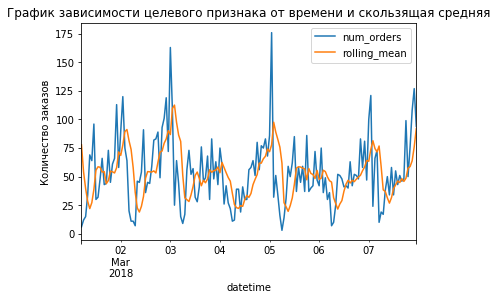

In [15]:
plt.figure(figsize=(12, 5))
data[['num_orders', 'rolling_mean']].loc['2018-03':'2018-03-7'].plot()
plt.title('График зависимости целевого признака от времени и скользящая средняя')
plt.ylabel('Количество заказов')
plt.show()

Наблюдается сильный разброс значений целевого признака в течение дня. Плюс ко всему, есть признаки сезонности.

Теперь посмотрим какие закономерности в сезонности и трендах удалось распознать компьютеру:

In [16]:
decomposed = seasonal_decompose(data['num_orders'])

Построим график тренда целевого признака:

Text(0, 0.5, 'Количество заказов')

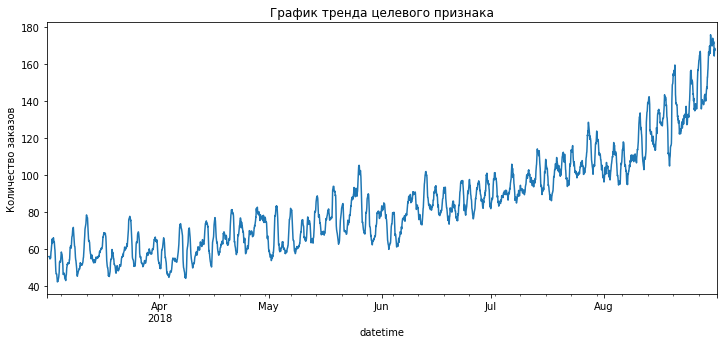

In [17]:
plt.figure(figsize=(12, 5))
decomposed.trend.plot()
plt.title('График тренда целевого признака')
plt.ylabel('Количество заказов')

Количество заказов неуклонно растет! И снова, нам неизвестно, это сезонные годовые колебания или тренд.

Построим график сезонности:

Text(0, 0.5, 'Количество заказов')

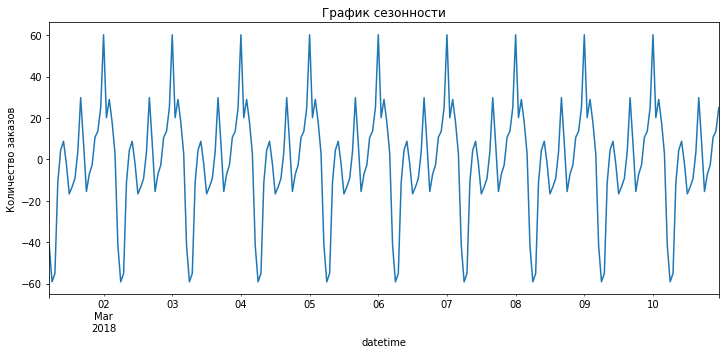

In [18]:
plt.figure(figsize=(12, 5))
decomposed.seasonal['2018-03':'2018-03-10'].plot()
plt.title('График сезонности')
plt.ylabel('Количество заказов')

Сезонность очень ярко выражена. День за днем картина повторяется. Поэтому сезонность у нас выражена в рамках одного дня. 

### Вывод:

- В данных по количеству заказов сервиса такси - наблюдается тренд на увеличение заказов. Однако неизвестно, это сезонный тренд или постоянный в связи с недостатком данных. 
- Так же, выяснилась сезонность целевого признака в рамках одного дня. Пик в ночное время около 00:00, резкий спад в утренние часы, и новые меньшие пики в течение дня. 

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Молодец)Здесь всё хорошо)
</div>

## Обучение

Прежде чем приступать к обучению, подготовим данные. Разделим их на выборки:

In [19]:
features = data.drop('num_orders', axis=1)
target = data.num_orders

In [20]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                           test_size=0.1, 
                                                                           shuffle = False)

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Я так понимаю, что будет использована cv, надеюсь ты не допустил там ошибок)
</div>

Проверим размерность полученных таблиц:

In [21]:
print(target_train.shape)
print(target_test.shape)
print(features_train.shape)
print(features_test.shape)

(3969,)
(442,)
(3969, 9)
(442, 9)


Построим несколько регрессионых моделей. Для каждой модели, по возможности подберем несколько наилучших гиперпараметров с помощью GridSearchCV.

Начнем обучение с построения модели градиентного бустинга из библиотеки LightGBM.

### Модель градиентного бустинга LightGBM

In [22]:
model = LGBMRegressor(random_state=42)

Зададим гиперпараметры для подбора:

In [23]:
params = {'num_leaves':range(100, 200, 50),
          'max_depth':range(2, 4, 1)}

In [24]:
clf = GridSearchCV(model, params, scoring='neg_mean_squared_error', cv=3)

<div class="alert alert-danger">
    
**Комментарий ревьюера**
    
Кирилл, так делать нельзя, т.к. делая перекрестную проверку будет момент, когда мы будем обучать на будущем, а предсказывать прошлое)Пожалуйста исправь) Либо раздели просто выборку на 3 части, либо воспользуйся методом для временных рядов)
    
P.S. Если есть какие-то вопросы, буду рад ответить) Плюс, принимаются пожелания по доп материалам)
</div>

Обучим модель и измерим время выполнения этой операции

In [25]:
%%time
clf.fit(features_train, target_train)

CPU times: user 2min 13s, sys: 622 ms, total: 2min 14s
Wall time: 2min 40s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=42,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 4),
                         'num_leaves': range(100, 200, 50)},
             pre_dispatch='2*n_jobs', refit=True, return_tra

In [26]:
best_lgbm_model = clf.best_estimator_

### Модель линейной регрессии

Так как у линейной регрессии нет численных гиперпараметров для перебора, обучим модель прямо "из коробки":

In [27]:
lr_model = LinearRegression()

In [28]:
%%time
lr_model.fit(features_train, target_train)

CPU times: user 4.66 ms, sys: 40 µs, total: 4.7 ms
Wall time: 88.6 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Модель случайного леса

In [29]:
params_rf = {'n_estimators': range(5, 15, 5),
             'max_depth': range(2, 6, 2)}

In [30]:
rf_model = RandomForestRegressor(random_state=42)

In [31]:
clf = GridSearchCV(rf_model, params_rf, scoring='neg_mean_absolute_error', cv=3)

In [32]:
%%time
clf.fit(features_train, target_train)

CPU times: user 670 ms, sys: 8.05 ms, total: 678 ms
Wall time: 5.2 s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(2, 6, 2),
    

In [33]:
best_model = clf.best_estimator_

## Тестирование

Оценим качетсво моделей:

In [34]:
prediction_lgbm = best_lgbm_model.predict(features_test)
prediction_lr = lr_model.predict(features_test)
prediction_rf = best_model.predict(features_test)
dummy_pred = target_test.shift(1, fill_value=0)

print('RMSE score LGBM: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, prediction_lgbm))))
print('RMSE score LinearRegression: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, prediction_lr))))
print('RMSE score RandomForestRegression: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, prediction_rf))))
print()
print('RMSE score DummyModel: {:.2f}'.format(np.sqrt(mean_squared_error(target_test, dummy_pred))))

RMSE score LGBM: 45.85
RMSE score LinearRegression: 52.60
RMSE score RandomForestRegression: 56.64

RMSE score DummyModel: 59.05


**Вывод:** 

Наилучший результат показала модель LGBM.  Она показала требуемый результат **RMSE не ниже 48**. При этом, каждая из моделей показала лучший результат в сравнении с Dummy - моделью, где значения следующего дня предсказываются текущими.

## Общий вывод

Нам удалось построить модель предсказания с качеством RMSE = 45.85

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48